For each year of birth YYYY after 1879, a comma-delimited file called yobYYYY.txt is created . Each record in the individual annual files has the format "name,sex,number," where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name. Each file is sorted first on sex and then on number of occurrences in descending order. When there is a tie on the number of occurrences, names are listed in alphabetical order. This sorting makes it easy to determine a name's rank. The first record for each sex has rank 1, the second record for each sex has rank 2, and so forth.

In [ ]:
''' Given folder has data of names of babies born in USA for 142 years i.e from 1879 to 2021. Our task is to visualise
 the number of male and female babies born in a particular year and analyse baby names by  sorting out top 100 birth 
 counts and group them by names to find out popular baby names'''

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Extracting a single file from dataset with column header

file_1880= pd.read_csv(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Naming trend\names2\yob1880.txt",names=['name','sex','birth'])
file_1880.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [6]:
file_1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   sex     2000 non-null   object
 2   birth   2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [7]:
file_1880.describe().T

,count,mean,std,min,25%,50%,75%,max
birth,2000.0,100.742,466.109199,5.0,7.0,13.0,41.25,9655.0


In [8]:
file_1880['sex'].value_counts()

M    1058
F     942
Name: sex, dtype: int64

In [12]:
#concatenate dataset

years=range(1880,2019)
arr=[]
columns=['name','sex','birth']
for year in years:
    path=r'C:\Users\saura\Documents\INTELLIPAT\Projects\Naming trend\names2\yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    arr.append(frame)

name=pd.concat(arr,ignore_index=True) #Concatenate pandas objects along a particular axis.
name 

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957713,Zylas,M,5,2018
1957714,Zyran,M,5,2018
1957715,Zyrie,M,5,2018
1957716,Zyron,M,5,2018


In [14]:
##Print total birth of male & feamle in each year

total_birth=name.pivot_table(values='birth',index='year',columns='sex',aggfunc=sum)
total_birth.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [15]:
total_birth.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,139.0,1.252651e+06,639816.782252,90994.0,872718.5,1467503.0,1773154.5,2044615.0
M,139.0,1.277838e+06,734770.272438,100737.0,751672.0,1572931.0,1907274.0,2156314.0


Text(0, 0.5, 'Count of births in million')

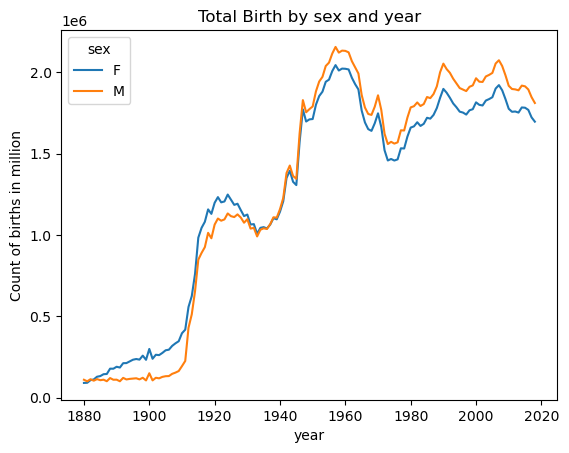

In [18]:
#Plot'Total Birth by sex and year'
total_birth.plot()
plt.title('Total Birth by sex and year')
plt.ylabel('Count of births in million')

In [19]:
#Sorting of baby name in each year

def top_name(popular_name):
    return popular_name.sort_values(by='birth',ascending=False)[:10]
p_name=name.groupby(['sex','birth'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [41]:
#Top 10 famous baby names of all time

famous_names=top_100.sort_values(by='birth', ascending=False)
famous_names.head(10)

,name,sex,birth,year
35136,Linda,F,99693,1947
35135,Linda,F,96212,1948
68238,James,M,94762,1947
68237,Michael,M,92723,1957
68236,Robert,M,91651,1947
35134,Linda,F,91019,1949
68235,Michael,M,90715,1956
68234,Michael,M,90574,1958
68233,James,M,88595,1948
68232,Michael,M,88570,1954


In [76]:
#Top 5 baby girls name

df=pd.DataFrame(famous_names[famous_names['sex']=='F'])
df=pd.DataFrame(df.name.unique())
df.head(5)

,0
0,Linda
1,Mary
2,Jennifer
3,Lisa
4,Patricia


In [77]:
#Top 5 baby girls name

df=pd.DataFrame(famous_names[famous_names['sex']=='M'])
df=pd.DataFrame(df.name.unique())
df.head(5)

,0
0,James
1,Michael
2,Robert
3,John
4,David
